# Instruction
For this assignment submit a single file, either MS WORD or PDF in addition to your Python codes with descriptions. The Python codes need to have comments. The assignments must be done individually.
Format Requirements for all assignments:

• No page limits\
• Single spaced, 12-point or larger font size; 1-inch margins\
• Use headers and/or bullets to organize and convey key elements, and page numbers\
• Only Latin alphabet characters are allowed (i.e., do not include any words or phrases that contain non-English characters)\
• File type: Adobe PDF (recommended) or Word document

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


1- (2 points) Definitions: Use our textbook, online sources, other books, handouts, and library materials (available virtually at American University Library Website) to answer the following questions.

a) What is “security” in the financial domain?\
- A security is a tradable financial asset. There are three examples of the security part in the US:
1. Equity securities – e.g. stock
2. Debt securities – e.g. bonds and banknotes
3. Derivatives – e.g. options and futures

b) Define “drift” and explain about this concept in financial engineering.
- The definition of drift is that individual securities in the portfolio appreciate or depreciate in value over time, causing them to drift away from their original allocations, the following formula is：`Drift = ( Difference of security 1 + ...... + Difference of security n) / 2`.

c) What is Brownian Motion
- Brownian motion is a simple continuous stochastic process. It is widely used in finance and physics to model random behavior.

d) Explain about the use of Lognormal in financial engineering and asset prices. How does the transformation of “return” from actual prices to logarithmic value of return helps the prediction of stock prices?
- As changes in the natural logarithm are approximately equal to percentage changes in the original series. In statistics, we mainly consider using logarithm for data transformation in priority. The result of lognormal distribution is close to the result of normal distribution. 
- The main point of using lognormal distribution in financial engineering is that it has a zero lower bound. In stock marketing, we cannot predict that the stock price is below zero, meaning that the lognormal distribution is an appropriate method to support stock market forecasting.

### References
1. https://en.wikipedia.org/wiki/Security_(finance)
2. https://corporatefinanceinstitute.com/resources/knowledge/finance/security/
3. https://ycharts.com/glossary/terms/drift#:~:text=Drift%20occurs%20as%20individual%20securities,their%20original%20allocations%20over%20time.&text=Drift%20is%20calculated%20as%20the,actual%20weighting%20divided%20by%202.
4. https://financetrain.com/why-lognormal-distribution-is-used-to-describe-stock-prices/


2- (1 points) Generate a simple Brownian motion in the Python environment. To this end, use n=500 time period and generate random variable to create a Brownian Motion Graph. Explain the relationship between the graph you provided and price fluctuations in stock market.
- After the model has been executed 500 times, the ROA (return on assets) is positive.

The following Equation in Python
$$
Yn(t) = \frac{1}{\sqrt(n)} * \sum_{k} Zk
$$

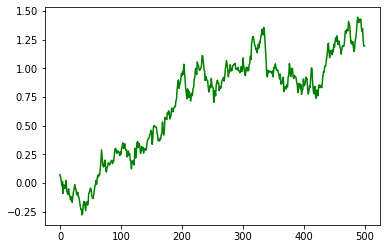

In [2]:
np.random.seed(1) # random number will be reproducible
n = 500

SQN = 1/np.math.sqrt(n) 
ZValues = np.random.randn(n) # return samples from normal distribution: N~(mean = 1, variance = 0)

Yk = 0

SBMotion = []

for k in range(n):
    Yk = Yk + SQN*ZValues[k]
    SBMotion.append(Yk)

plt.plot(SBMotion, "g")
plt.show()


3- (2 points) Re-do the Amazon stock price trend for Google that can be found in the following link. Explain the details of your analysis (https://finance.yahoo.com/quote/GOOG/history/).

a) Select a 5-year time period of your choice and depict the Google shares graph similar to what the book provided in Figure 8.3.
- The stock of google (GOOG) has seen a huge rise over the last five years.
- The dataset is from Mar 10, 2016 to Mar 10, 2021.

In [3]:
from google.colab import files
upload = files.upload()

Saving GOOG.csv to GOOG.csv


Close    1258
dtype: int64


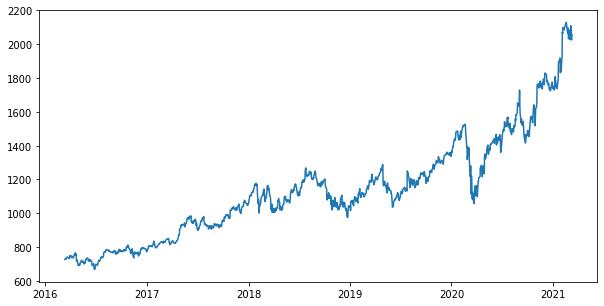

In [57]:
goog = pd.read_csv("GOOG.csv", header = 0, usecols = ["Date", "Close"], parse_dates = True, index_col = "Date")
# print(goog.count())
# check each variable type and Data Analysis & Exploratory Data Analysis (EDA)
# print(GOOG.info()_GOOG
# print(GOOG.describe()) # EDA
plt.figure(figsize=(10,5))
plt.plot(goog)
plt.show()

b) For the same time provide the Logarithmic Value of the returns similar to Figure 8.4. Provide the details of your analysis and include adequate comments in your Python code.
- We can see that the drift of the logarithmic scale is very similar to the original series, and the data points are follow a normal distribution. Also, the mean is stable.

               Close
Date                
2021-02-25 -0.030929
2021-02-26  0.002704
2021-03-01  0.021684
2021-03-02 -0.002728
2021-03-03 -0.023952
2021-03-04  0.010982
2021-03-05  0.028600
2021-03-08 -0.040836
2021-03-09  0.013996
2021-03-10  0.001134


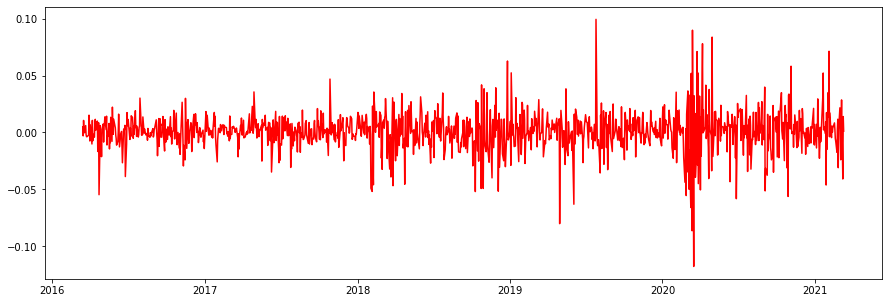

In [50]:
# percentage change between the current and a prior element
googPctChange = goog.pct_change() 
#print(googPctChange)

# return on a logarithmic scale with plot
googLogReturns = np.log(1+googPctChange)
print(googLogReturns.tail(10))
plt.figure(figsize = (15, 5))
plt.plot(googLogReturns, "r")
plt.show()

4- (1 points) Explain about applying Monte Carlo Simulation to estimate stock price provided in Page 216 of the book. As the procedure is already explained, you only need to provide steps using which the estimation can be performed.
- 

5- (2 points) Use the data in Problem 3 above to evaluate the first (drift) and second (daily change) components of the Black-Scholes formula. Prepare the Google trend graph similar to Figure 8.5.

Drift =  [0.0006866]


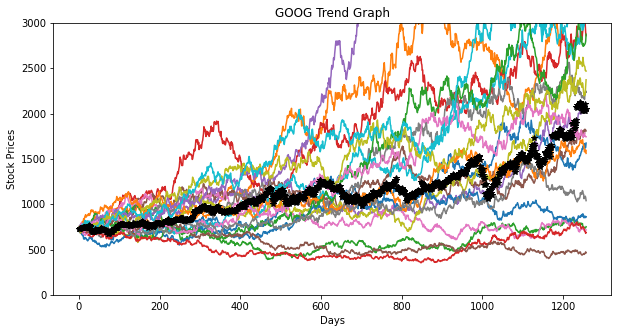

In [80]:
# Black-Scholes model (BS) - stocks, currencies, and interest rates
from scipy.stats import norm
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

MeanLogReturns = np.array(googLogReturns.mean()) # mean
# print(MeanLogReturns)

VarLogReturns = np.array(googLogReturns.var()) # variance

StdevLogReturns = np.array(googLogReturns.std()) # standard deviation

# we need the mean and variance to evaluate the drift
Drift = MeanLogReturns - (0.5 * VarLogReturns) # why -0.5? Because historical values are eroded in the future
print("Drift = ",Drift)

# set the number of intervals and iterations
NumIntervals = int(goog.count()) # equal to the number of the observations: 1258
Iterations = 20 # the number of simulation models that we intend to develop

# generate the random distribution, will return 1258*20 matrix
np.random.seed(1)
SBMotion = norm.ppf(np.random.rand(NumIntervals, Iterations))
"""
np.random.rand: Create an array of the given shape and populate it with random samples from a uniform distribution over [0, 1): return 1258 rows*20 columns
norm.ppf: The .ppf() function calculates the probability for a given normal distribution value. That is, proability of PDF.
"""

DailyReturns = np.exp(Drift + StdevLogReturns * SBMotion) # A positive return means the stock has grown in value
# print(DailyReturns)

# Start to predict the prices
StartStockPrices = goog.iloc[0] # extract the specific observation, recover the first value
# print(StartStockPrices)
StockPrice = np.zeros_like(DailyReturns) # return an array of zeros with the same shape and type as a given array
StockPrice[0] = StartStockPrices

for time in range(1, NumIntervals):

    StockPrice[time] = StockPrice[time - 1] * DailyReturns[time] # BS model
    
# Plot
plt.figure(figsize=(10,5))
plt.plot(StockPrice)   
# add actual trend as Google stock prices in the last 5 years as black line
googTrend = np.array(goog.iloc[:, 0:1])
plt.plot(googTrend,'k*') # "k*" = * boad line, k = balck color
plt.xlabel("Days"); plt.ylabel("Stock Prices"); plt.title("GOOG Trend Graph")
plt.ylim(0, 3000) # we only want to focus on the most part of simulating result
plt.show()

In [60]:
from scipy.stats import norm
print(norm.ppf(0.95))
print(norm.cdf(1.6448536269514722))

1.6448536269514722
0.95


6- (2 points) Estimating the VaR for some S&P 500 assets by doing the following steps:

a) S&P 500 is an important stock market index. Using online sources (with reference) provide a two-paragraph description of the index including the history and major assets.
b) Using the following stock list, retrieve the data from Yahoo! Finance and provide the statistics of the Portfolio similar to Figure 8.7.



> StockList = {ACN, ADBE, ALL, AAPL, BAC, PG}


c) Assess the investment risk of a substantial portfolio of stocks of these companies. Provide detailed explanations.